<a href="https://colab.research.google.com/github/linetmshaji/Insurance-Fraud-Detection/blob/Dataset/salary_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# reading csv file using pandas 
dataset = pd.read_csv("salary.csv",encoding = "ISO-8859-1")
# returns first 5 rows
dataset.head()

FileNotFoundError: ignored

In [ ]:
# To print no of unique values in each columns of a dataset in ascending order
unique_value = dataset.nunique(axis=0) 
table= pd.DataFrame()
table['Value']= unique_value            
table=table.sort_values('Value',ascending=False)
table

,Value
id,2946
orignal_website_directory,2946
url,2946
your_favoritearticle_today,2945
last_pymnt_amnt,2678
...,...
next_pymnt_d,2
Target_Satisfied,2
term,2
Process Date,1


In [ ]:
# it will print out number of rows and columns in the given dataset
dataset.shape

(2946, 83)

In [ ]:
# It will drop the column pymnt_plan
dataset.drop('pymnt_plan',
  axis='columns', inplace=True)

In [ ]:
#It will drop all the columns which has NAN values
dataset = dataset.dropna(axis='columns')
dataset.shape

(2946, 26)

In [ ]:
# check missing values in variables
dataset.isnull().sum()


id                           0
Target_Salary                0
Target_Satisfied             0
LOAN_AMT                     0
Business Title               0
Civil Service Title          0
Division/Work Unit           0
Job Description              0
CompanySize                  0
term                         0
loan_status                  0
orignal_website_directory    0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
earliest_cr_line             0
last_pymnt_d                 0
last_pymnt_amnt              0
last_credit_pull_d           0
Time                         0
url                          0
dateAdded                    0
previousaddress              0
phones                       0
CrimeTime                    0
dtype: int64

In [ ]:
# It will discribe the dataset
dataset.describe()

,id,Target_Salary,Target_Satisfied,dti,last_pymnt_amnt
count,2.946000e+03,2946.000000,2946.000000,2946.000000,2946.000000
mean,6.830623e+07,58904.139794,0.210115,19.444117,4663.227026
std,1.814269e+06,26986.575936,0.407460,8.628543,6855.297610
min,3.617740e+05,0.000000,0.000000,0.000000,0.030000
25%,6.837622e+07,49390.000000,0.000000,13.035000,362.980000
50%,6.846507e+07,58440.000000,0.000000,18.905000,842.235000
75%,6.853764e+07,73171.750000,0.000000,25.580000,6832.185000
max,6.861706e+07,218587.000000,1.000000,51.200000,35467.750000


In [ ]:
# View summary of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2946 non-null   int64  
 1   Target_Salary              2946 non-null   float64
 2   Target_Satisfied           2946 non-null   int64  
 3   LOAN_AMT                   2946 non-null   object 
 4   Business Title             2946 non-null   object 
 5   Civil Service Title        2946 non-null   object 
 6   Division/Work Unit         2946 non-null   object 
 7   Job Description            2946 non-null   object 
 8   CompanySize                2946 non-null   object 
 9   term                       2946 non-null   object 
 10  loan_status                2946 non-null   object 
 11  orignal_website_directory  2946 non-null   object 
 12  purpose                    2946 non-null   object 
 13  zip_code                   2946 non-null   objec

In [ ]:
#lets do Lable enconding coding to make more features 
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in dataset:
    if dataset[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(dataset[col].unique())) <= 2:
            # Train on the training data
            le.fit(dataset[col])
            # Transform both training and testing data
            dataset[col] = le.transform(dataset[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)
dataset

1 columns were label encoded.


,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,CompanySize,term,loan_status,orignal_website_directory,purpose,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,Time,url,dateAdded,previousaddress,phones,CrimeTime
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,20 to 99 employees,0,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,190xx,PA,5.91,03-Aug,19-Jan,122.67,19-Mar,3/22/2016 9:51,nobell.it/70ffb52d079109dca5664cce6f317373782/...,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,"10,000 or more employees",0,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,577xx,SD,16.06,Dec-99,16-Jun,926.35,19-Mar,3/22/2016 10:08,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
2,68341763,51907.68,0,"$20,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",20 to 99 employees,1,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,605xx,IL,10.78,Aug-00,17-Jun,15813.30,19-Mar,3/22/2016 10:08,serviciosbys.com/paypal.cgi.bin.get-into.herf....,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
3,66310712,51907.68,0,"$35,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",100 to 499 employees,1,Current,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,076xx,NJ,17.06,08-Sep,19-Feb,829.90,19-Mar,3/22/2016 10:08,mail.printakid.com/www.online.americanexpress....,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00
4,68476807,35.00,1,"$10,400.00",Temporary Painter,PAINTER,Dept of Management & Planning,Responsibilities of selected candidates will i...,"10,000 or more employees",1,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,174xx,PA,25.37,Jun-98,16-Jul,10128.96,18-Mar,3/22/2016 10:08,thewhiskeydregs.com/wp-content/themes/widescre...,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:31:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,68394526,67757.00,0,"$14,000.00",Senior Mechanical Cost Estimator,CONSTRUCTION PROJECT MANAGER,"Eng, Design Const Supp",The New York City Department of Housing Preser...,20 to 99 employees,1,Current,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,234xx,VA,15.54,03-Jan,19-Mar,321.71,19-Mar,3/23/2016 12:07,www.rezidentcr.cz/includes/PEAR/layouts/mobile...,2017-10-18T16:27:38Z,512 Ave U,(718) 336-3888,8:45:00
2942,68404684,67757.00,1,"$18,675.00",Senior Mechanical Cost Estimator,CONSTRUCTION PROJECT MANAGER,"Eng, Design Const Supp",The New York City Department of Housing Preser...,"5,000 to 9,999 employees",1,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,207xx,MD,26.74,03-Nov,17-Nov,14248.32,19-Mar,3/23/2016 12:07,www.motolobo.com/gallery2/.xo.php,2017-10-18T16:27:38Z,512 Ave U,(718) 336-3888,8:25:00
2943,68414567,54100.00,0,"$24,000.00",Conversion Coordinator,COMMUNITY COORDINATOR,Operations,The New York City Department of Housing Preser...,"10,000 or more employees",0,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,907xx,CA,23.43,Dec-99,16-Mar,23684.51,19-Mar,3/23/2016 12:07,youthscorner.com/wp-content/plugins/akismet/,2017-10-18T16:27:38Z,512 Ave U,(718) 336-3888,8:00:00
2944,68373599,54100.00,0,"$2,500.00",Conversion Coordinator,COMMUNITY COORDINA

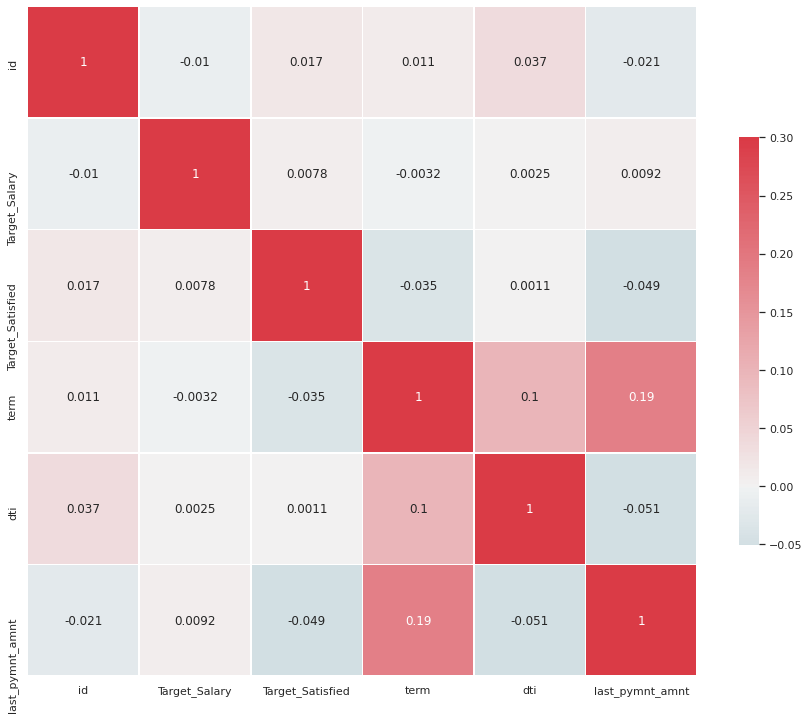

In [ ]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(dataset.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# To print no of unique values in each columns of a dataset in ascending order
unique_value = dataset.nunique(axis=0) 
table= pd.DataFrame()
table['Value']= unique_value            
table=table.sort_values('Value',ascending=False)
table

,Value
id,2946
url,2946
orignal_website_directory,2946
last_pymnt_amnt,2678
dti,1898
Job Description,1608
Business Title,1244
CrimeTime,754
Time,698
Division/Work Unit,678


In [ ]:
dataset = pd.get_dummies(dataset)
datset.head()


In [ ]:
corr= dataset.corr()
y=np.array(dataset['Target_Satisfied'])
X= np.array(dataset.drop('Target_Satisfied',axis=1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape


((2356, 25), (590, 25))

id                             int64
Target_Salary                float64
LOAN_AMT                      object
Business Title                object
Civil Service Title           object
Division/Work Unit            object
Job Description               object
CompanySize                   object
term                           int64
loan_status                   object
orignal_website_directory     object
purpose                       object
zip_code                      object
addr_state                    object
dti                          float64
earliest_cr_line              object
last_pymnt_d                  object
last_pymnt_amnt              float64
last_credit_pull_d            object
Time                          object
url                           object
dateAdded                     object
previousaddress               object
phones                        object
CrimeTime                     object
dtype: object

In [ ]:
dataset['LOAN_AMT'] = dataset['LOAN_AMT'].astype(float, errors = 'raise')



X_train

ValueError: ignored

In [ ]:
X_train.dtypes

id                             int64
Target_Salary                float64
LOAN_AMT                      object
Business Title                object
Civil Service Title           object
Division/Work Unit            object
Job Description               object
CompanySize                   object
term                           int64
loan_status                   object
orignal_website_directory     object
purpose                       object
zip_code                      object
addr_state                    object
dti                          float64
earliest_cr_line              object
last_pymnt_d                  object
last_pymnt_amnt              float64
last_credit_pull_d            object
Time                          object
url                           object
dateAdded                     object
previousaddress               object
phones                        object
CrimeTime                     object
dtype: object

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: ignored

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))